# Predicting Customer Churn in Banking: A Binary Classification Approach

Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")



#Data Collection

In [ ]:
df = pd.read_csv("/content/Customer-Churn-Records.csv")

#Exploratory Data Analysis

In [ ]:
df.shape

(10000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Identifying categorical and numerical features in the dataset

In [ ]:
num_Col = ['EstimatedSalary', 'Balance', 'CreditScore','Age']
cat_Col = ['HasCrCard', 'IsActiveMember', 'Geography','Gender', 'NumOfProducts', 'Tenure']

#Data Cleaning


In [ ]:
#drop all columns which is not necessary
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname','Complain',	'Satisfaction Score',	'Card Type',	'Point Earned'], inplace=True)

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing

In [ ]:
#Label Encoding
label_encodor = LabelEncoder()
lstforle = ['Geography', 'Gender']
for i in lstforle :
    df[i] = label_encodor.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',label_encodor.inverse_transform(df[i].unique()))

Geography  :  [0 2 1]  =  ['France' 'Spain' 'Germany']
Gender  :  [0 1]  =  ['Female' 'Male']


In [ ]:
#Exploring data
#Exited  (l[0]-Remained  1[1]-Churned)
l = list(df['Exited'].value_counts())
print(f"Remained: {l[0]} ; Churned: {l[1]}")

Remained: 7962 ; Churned: 2038


In [ ]:
#visualisation
sumLenn = sum(l)
#percentage of customers who remained and churned
proc = [l[0] / sumLenn * 100, l[1] / sumLenn * 100]

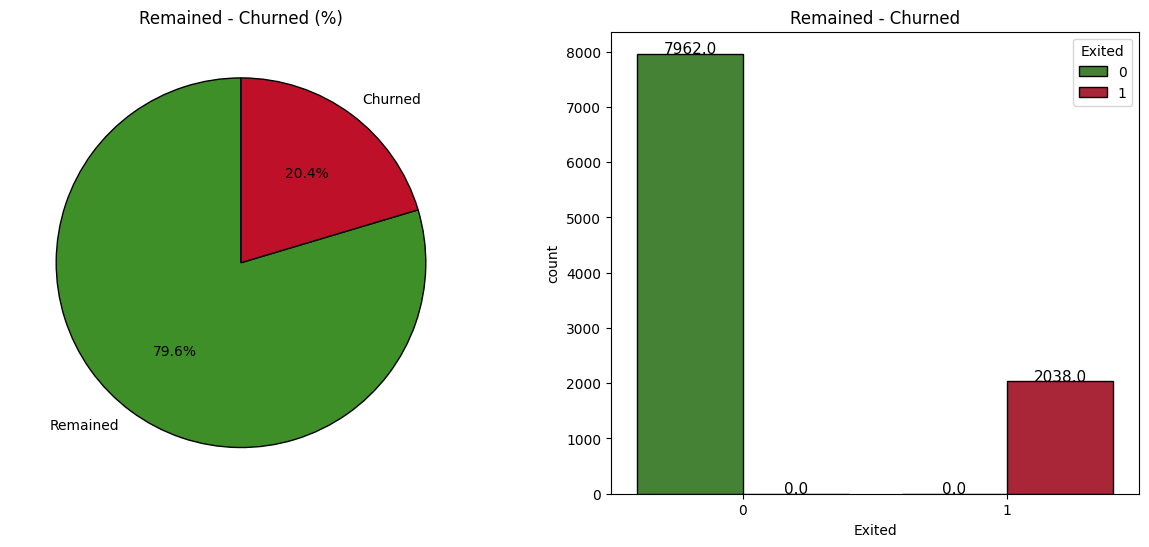

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.pie(proc,
        labels=['Remained', 'Churned'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#3f8f29', '#bf1029'],
        wedgeprops={'edgecolor': 'black', 'antialiased': True})
plt.title('Remained - Churned (%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = df['Exited'],
                   hue = df['Exited'],
                   palette = ['#3f8f29', '#bf1029'],
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2,
            rect.get_height() + 2,
            rect.get_height() ,
            horizontalalignment='center',
            fontsize = 11)
plt.title('Remained - Churned');


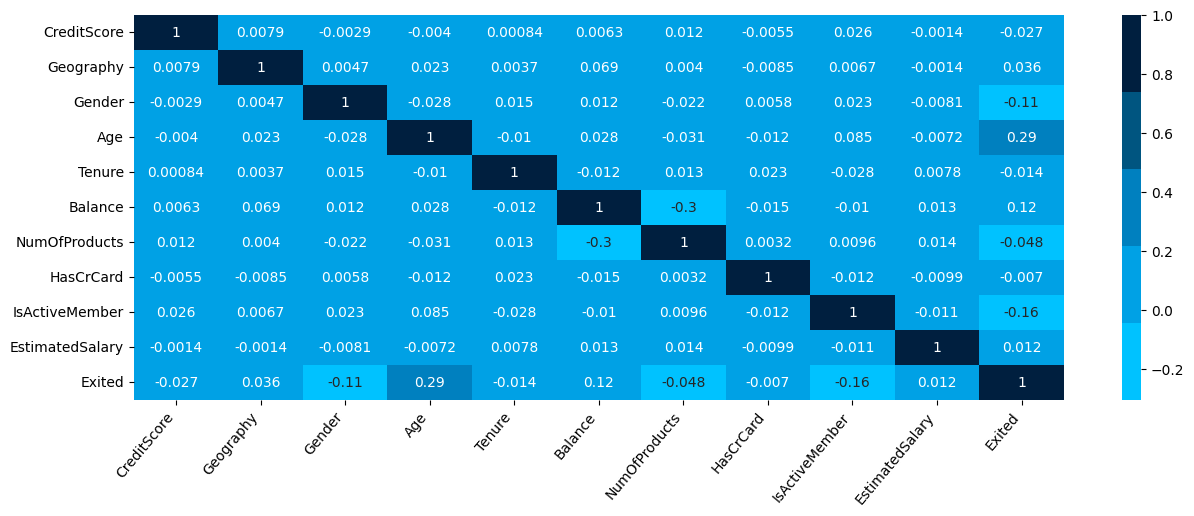

In [ ]:
#Identifying connections and correlations between variables
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(),
            cmap = ['#00C2FF', '#00A1E5', '#0080BF', '#005580', '#001F3F'],
            annot=True)
plt.xticks(rotation=50, ha='right');

#Analysis of categorical features

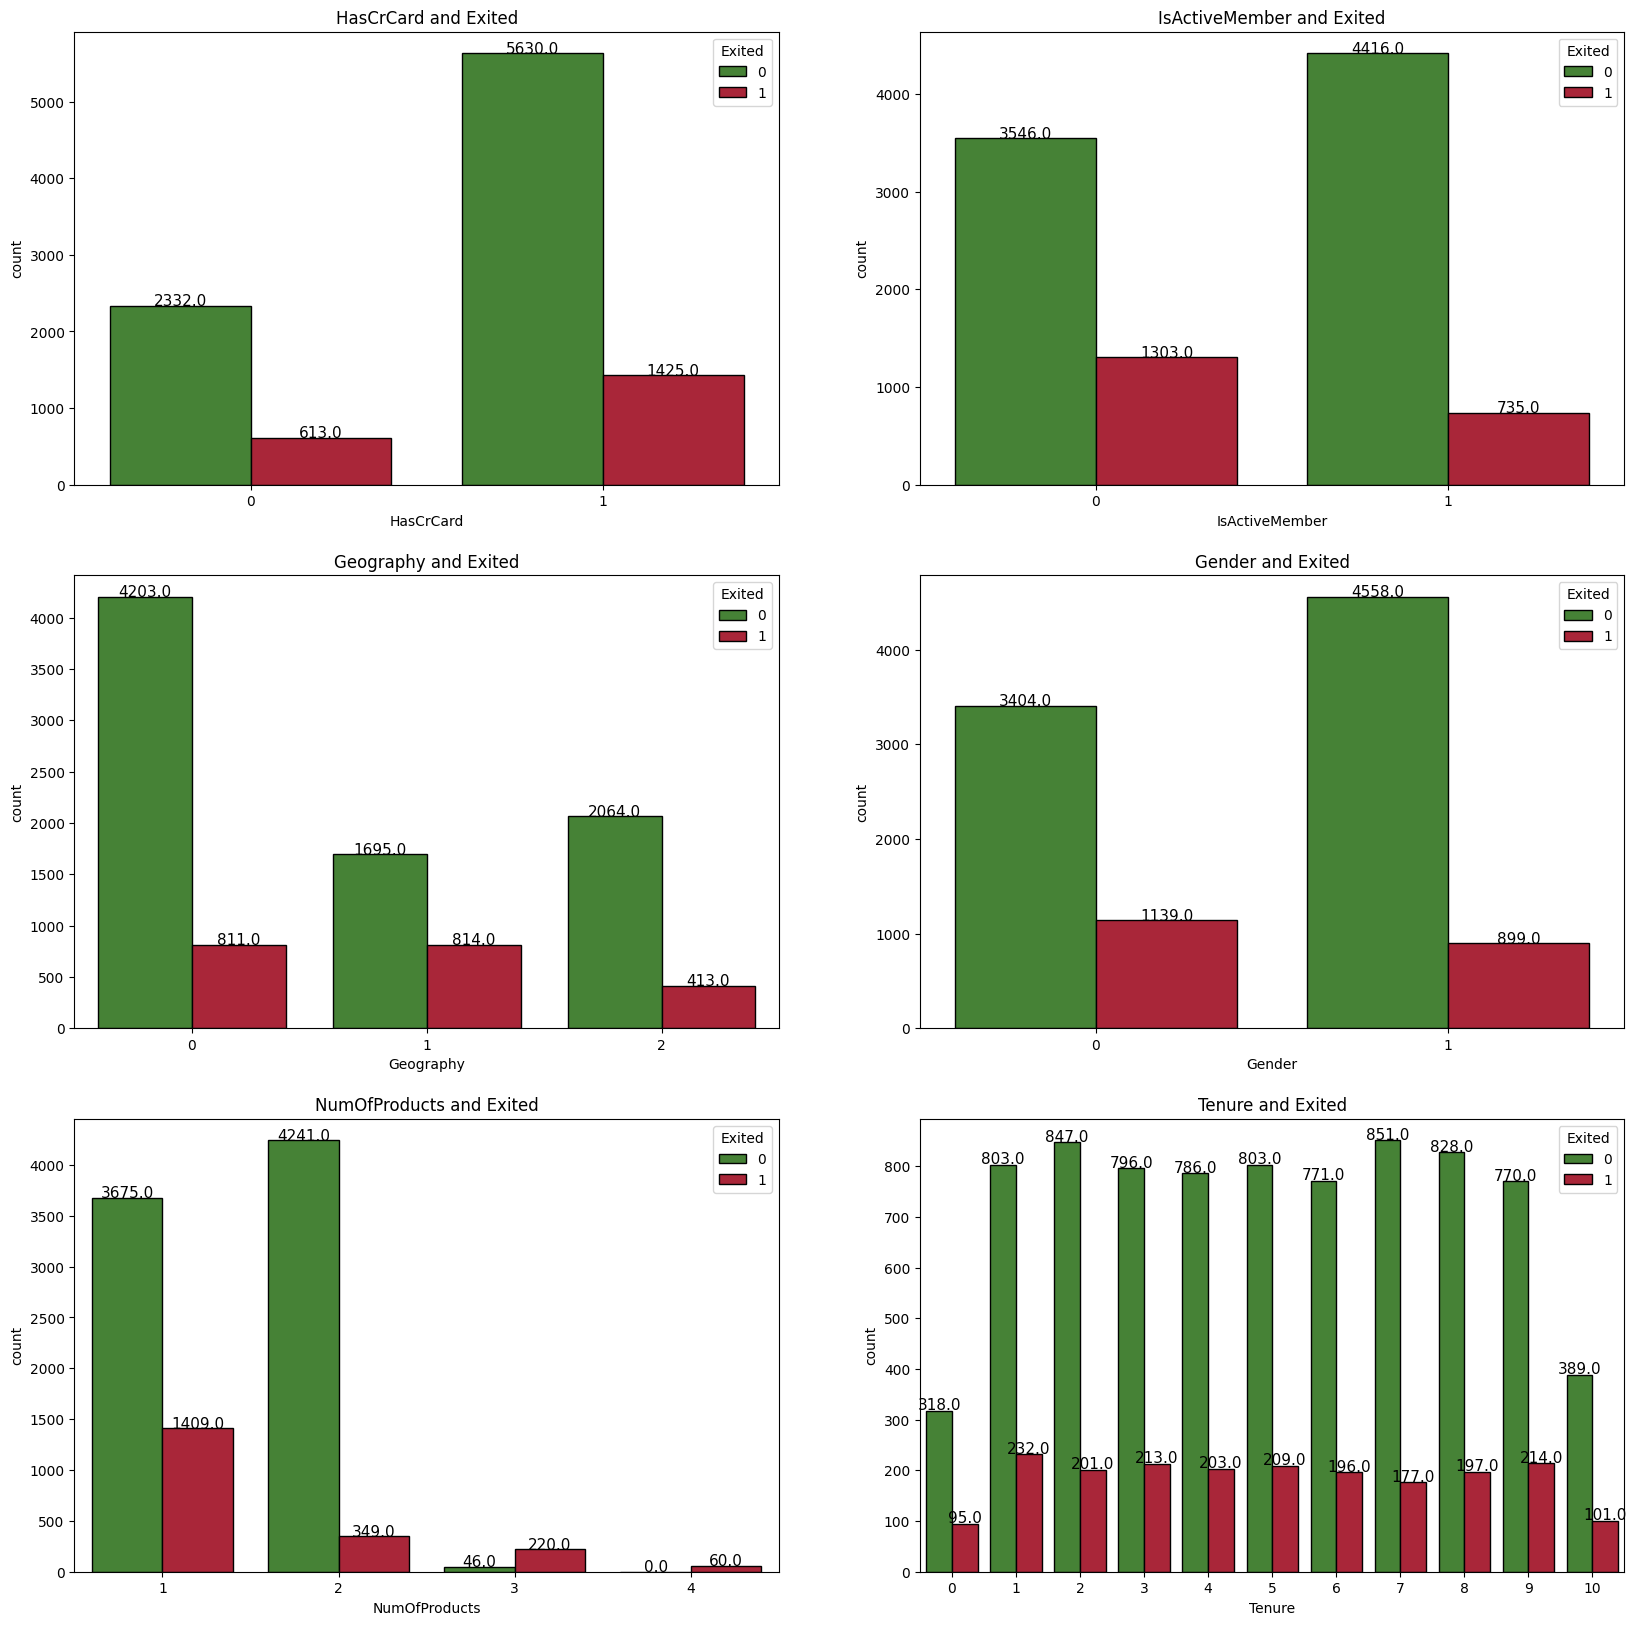

In [ ]:
fig = plt.subplots(figsize = (20, 20))
for i in range(len(cat_Col)):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x = cat_Col[i],data = df,hue = "Exited",palette = [ '#3f8f29', '#bf1029'],edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),\
                horizontalalignment='center', fontsize = 11)
    title = cat_Col[i] + ' and Exited'
    plt.title(title);

In [ ]:
for feature in cat_Col:
    unique_values = df[feature].unique()
    unique_values.sort()

    for value in unique_values:
        count_total = len(df[df[feature] == value])
        count_remained = len(df[(df[feature] == value) & (df['Exited'] == 0)])
        count_churned = len(df[(df[feature] == value) & (df['Exited'] == 1)])

        if count_total != 0:
            percentage_remained = (count_remained / count_total) * 100
            percentage_churned = (count_churned / count_total) * 100
        else:
            percentage_remained = 0
            percentage_churned = 0

        print(f"{feature} = {value}: Remained = {percentage_remained:.2f}%, Churned = {percentage_churned:.2f}%")

HasCrCard = 0: Remained = 79.19%, Churned = 20.81%
HasCrCard = 1: Remained = 79.80%, Churned = 20.20%
IsActiveMember = 0: Remained = 73.13%, Churned = 26.87%
IsActiveMember = 1: Remained = 85.73%, Churned = 14.27%
Geography = 0: Remained = 83.83%, Churned = 16.17%
Geography = 1: Remained = 67.56%, Churned = 32.44%
Geography = 2: Remained = 83.33%, Churned = 16.67%
Gender = 0: Remained = 74.93%, Churned = 25.07%
Gender = 1: Remained = 83.53%, Churned = 16.47%
NumOfProducts = 1: Remained = 72.29%, Churned = 27.71%
NumOfProducts = 2: Remained = 92.40%, Churned = 7.60%
NumOfProducts = 3: Remained = 17.29%, Churned = 82.71%
NumOfProducts = 4: Remained = 0.00%, Churned = 100.00%
Tenure = 0: Remained = 77.00%, Churned = 23.00%
Tenure = 1: Remained = 77.58%, Churned = 22.42%
Tenure = 2: Remained = 80.82%, Churned = 19.18%
Tenure = 3: Remained = 78.89%, Churned = 21.11%
Tenure = 4: Remained = 79.47%, Churned = 20.53%
Tenure = 5: Remained = 79.35%, Churned = 20.65%
Tenure = 6: Remained = 79.73%,

*   The HasCrCard feature did not show class differentiation.
*   The Geography feature turned out to be underestimated by the Chi-square. Country 1 (Germany) shows the highest customer churn, while the other two have an equal distribution of classes.
*   The IsActiveMember feature predictably indicates that the chance of losing an active customer is less than that of an inactive one.
*   The Gender feature also shows a significant difference between classes: women are 70% more likely to leave the bank.
*   The NumOfProducts feature shows quite significant differences between classes. The smallest churn rate is among customers with two bank products. However, after two products, the churn increases.
*   The Tenure feature shows a slow decline until 8 years. At 8-9 years, churn rates show an increase.






#Analysis of numerical features

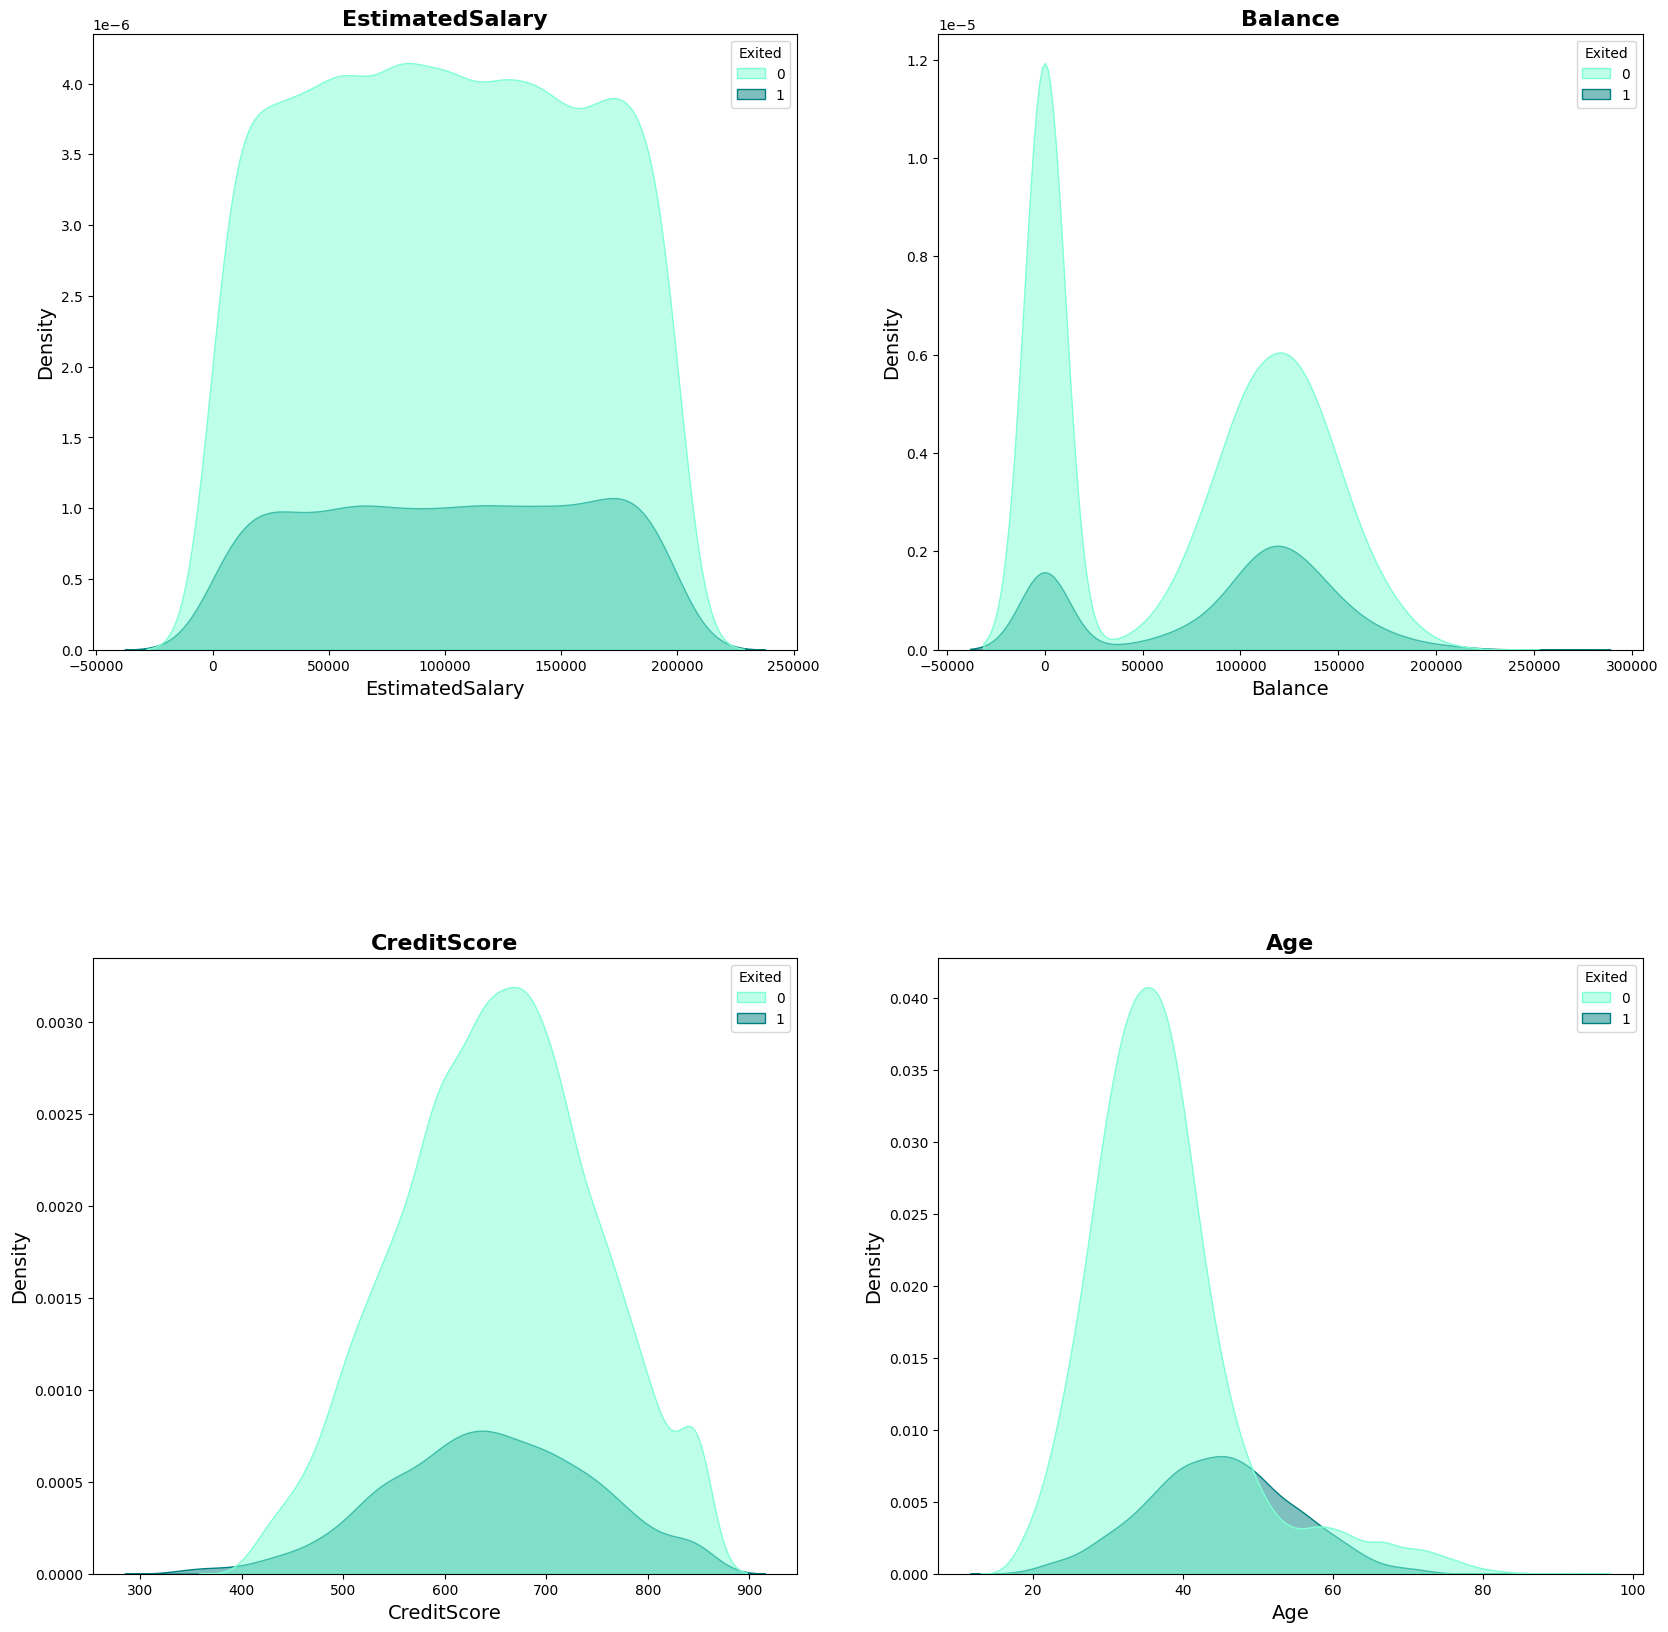

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (20,20))
plt.subplots_adjust(hspace=0.5)
columns = df[num_Col]
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                x = column,
                fill = True,
                alpha = 0.5,
                hue = 'Exited',
                palette = [ '#7FFFD4', '#008080'],
                ax = ax)

    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Density', fontsize = 14)
plt.show()

* With the increase in EstimatedSalary, the churn rate shows a slight linear increase.

* When the balance is zero, the churn rate is lower compared to other cases.
* Customers with a high credit score are less likely to leave the bank.
* There is a significant difference in the age distributions.

In [ ]:
df[num_Col].describe()

,EstimatedSalary,Balance,CreditScore,Age
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,100090.239881,76485.889288,650.528800,38.921800
std,57510.492818,62397.405202,96.653299,10.487806
min,11.580000,0.000000,350.000000,18.000000
25%,51002.110000,0.000000,584.000000,32.000000
50%,100193.915000,97198.540000,652.000000,37.000000
75%,149388.247500,127644.240000,718.000000,44.000000
max,199992.480000,250898.090000,850.000000,92.000000


#Feature engineering

In [ ]:
#normalization
sc = StandardScaler()
for col in num_Col:
    df[col] = sc.fit_transform(df[[col]])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0


In [ ]:
#removing unnecessary columns
df.drop(columns = ['HasCrCard'], inplace=True)

In [ ]:
#oversampling
over = SMOTE(sampling_strategy = 1)

f1 = df.drop(columns=['Exited']).iloc[:,:].values
t1 = df.iloc[:, -1].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({1: 7962, 0: 7962})

In [ ]:
#spliting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.22, random_state = 100)

In [ ]:
len(x_test)

3504

#Model Training

In [ ]:
def RunModel(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    pred = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    cr_v_sc = cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc')
    r_a_s = roc_auc_score(y_test,pred)
    print("Cross Validation Score : ",'{0:.2%}'.format(cr_v_sc.mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(r_a_s))

def model_evaluation(classifier,x_test,y_test):

    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.3%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = ['#20B2AA','#48D1CC'],fmt ='')

    print(classification_report(y_test,classifier.predict(x_test)))

## Logistic Regression

In [ ]:
LR = LogisticRegression()

RunModel(LR,x_train,y_train,x_test,y_test)

Cross Validation Score :  77.04%
ROC_AUC Score :  68.93%


## Model Evaluation

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1735
           1       0.70      0.68      0.69      1769

    accuracy                           0.69      3504
   macro avg       0.69      0.69      0.69      3504
weighted avg       0.69      0.69      0.69      3504



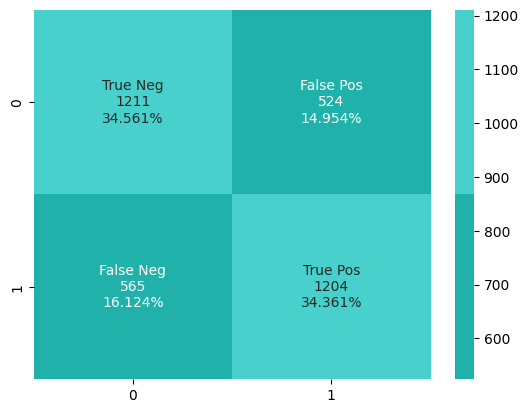

In [ ]:
model_evaluation(LR,x_test,y_test)

random forest

In [ ]:
RanForCla = RandomForestClassifier()
RunModel(RanForCla,x_train,y_train,x_test,y_test)

Cross Validation Score :  96.17%
ROC_AUC Score :  90.09%


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1735
           1       0.92      0.88      0.90      1769

    accuracy                           0.90      3504
   macro avg       0.90      0.90      0.90      3504
weighted avg       0.90      0.90      0.90      3504



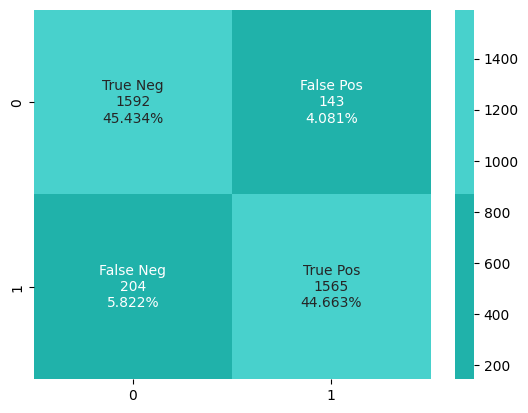

In [ ]:
model_evaluation(RanForCla,x_test,y_test)

K-Nearest Neighbors (KNN)


K-Nearest Neighbors:
Cross Validation Score :  91.61%
ROC_AUC Score :  85.30%
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1735
           1       0.80      0.94      0.87      1769

    accuracy                           0.85      3504
   macro avg       0.87      0.85      0.85      3504
weighted avg       0.86      0.85      0.85      3504



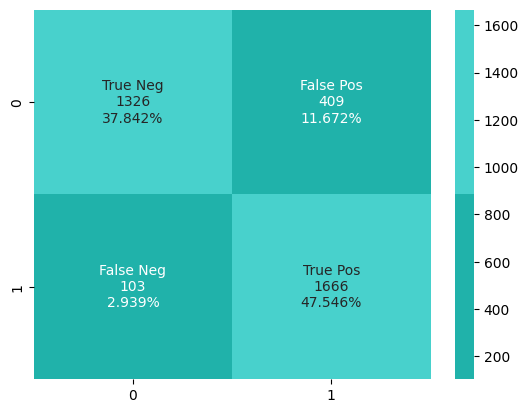

In [ ]:
KNN = KNeighborsClassifier()
print("\nK-Nearest Neighbors:")
RunModel(KNN, x_train, y_train, x_test, y_test)
model_evaluation(KNN, x_test, y_test)
plt.show()

Decision Tree


Decision Tree:
Cross Validation Score :  84.77%
ROC_AUC Score :  83.36%
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1735
           1       0.83      0.84      0.84      1769

    accuracy                           0.83      3504
   macro avg       0.83      0.83      0.83      3504
weighted avg       0.83      0.83      0.83      3504



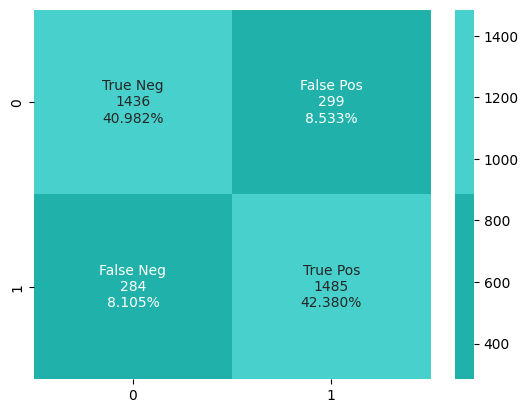

In [ ]:
DT = DecisionTreeClassifier()
print("\nDecision Tree:")
RunModel(DT, x_train, y_train, x_test, y_test)
model_evaluation(DT, x_test, y_test)
plt.show()

Support Vector Machine (SVM)


Support Vector Machine:
Cross Validation Score :  85.01%
ROC_AUC Score :  77.62%
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1735
           1       0.77      0.79      0.78      1769

    accuracy                           0.78      3504
   macro avg       0.78      0.78      0.78      3504
weighted avg       0.78      0.78      0.78      3504



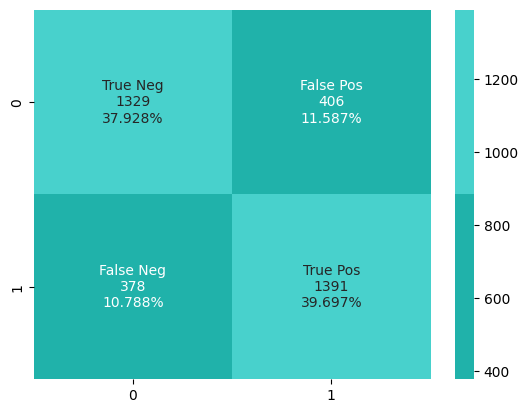

In [ ]:
SVM = SVC(probability=True)
print("\nSupport Vector Machine:")
RunModel(SVM, x_train, y_train, x_test, y_test)
model_evaluation(SVM, x_test, y_test)
plt.show()


XGBoost:
Cross Validation Score :  95.79%
ROC_AUC Score :  89.67%
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1735
           1       0.92      0.87      0.89      1769

    accuracy                           0.90      3504
   macro avg       0.90      0.90      0.90      3504
weighted avg       0.90      0.90      0.90      3504



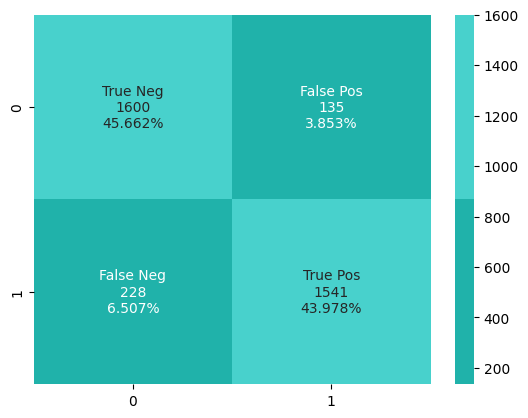

In [ ]:

XGB = XGBClassifier()
print("\nXGBoost:")
RunModel(XGB, x_train, y_train, x_test, y_test)
model_evaluation(XGB, x_test, y_test)
